#1.CURRENCY EXCHANGE RATES


- A exchage rate is the price of the domestic currency stated in terms of another currency.
- A global currency is the one that is accepted for trade throughout the world. The U.S. Dollar is the strongest world currency so governments acroos the world set USD as an international currency for trade.
- Banks and other registered currency traders act as intermediates in currency exchange markets.
- Trading doesn't happen during weekends and public holidays.
- Currency exchange rates are determined by supply and demand in the market. However there are many leading factors that effects the currenct exchange rate. The main factor that impact currency rate is "Inflation Rates".
- Other factors are :- Intrest Rates, Country's current account/balance of payments, government debt, political stability and performance.

#2.IMPORT BASIC LIBRARIES 
- IMPORT BASIC LIBRARIES
- IMPORT MODEL BUILDING LIBRARIES
- LOAD DATASET
- PERFORM BASIC OPERATIONS 


In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 

In [ ]:
# import model building libraries
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# load the dataset
exchange_rates = pd.read_csv("/content/drive/MyDrive/project 1/DEXINUS.csv")
exchange_rates.head(10)

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
5,1973-01-09,8.00
6,1973-01-10,8.00
7,1973-01-11,8.00
8,1973-01-12,8.00
9,1973-01-15,8.00


In [ ]:
exchange_rates.tail(10)

,observation_date,DEXINUS
12639,2021-06-14,73.16
12640,2021-06-15,73.35
12641,2021-06-16,73.31
12642,2021-06-17,74.16
12643,2021-06-18,74.14
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14
12648,2021-06-25,74.14


#3.EDA Exploratory Data Analysis

In [ ]:
# SHAPE OF THE DATASET
exchange_rates.shape

(12649, 2)

In [ ]:

# DESCRIBE OF THE DATASET
exchange_rates.describe()

,DEXINUS
count,12155.000000
mean,34.206133
std,21.089190
min,7.190000
25%,12.075000
50%,35.890000
75%,47.650000
max,76.950000


In [ ]:

# MODIFY THE COLUMN NAMES TO SIMPLE AND IDENTIFIABLE NAMES
exchange_rates = exchange_rates.rename({'observation_date':'Date','DEXINUS':'Dexinus'},axis = 1)


In [ ]:

# IDENTIFY THE NULL VALUES
exchange_rates.isnull().sum()

Date         0
Dexinus    494
dtype: int64

There are total of 494 null values in the dataset. The null values are because of weekends and public hilodays declares by federal bank of America. The currency exchange markets are closed on these days.
- Here removing the null values is not a preferred approch. If i remove the null values from the data i loose almost 1 and half year data.
- So, i refill the null values with the last closing value in that week using the "ffill" or "interpolation" function.

In [ ]:

# PREFILL THE NULL VALUES WITH THE PREVIOUS VALUES
exchange_rates.ffill(inplace = True)
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     12649 non-null  object 
 1   Dexinus  12649 non-null  float64
dtypes: float64(1), object(1)
memory usage: 197.8+ KB


In [ ]:
# IDENTIFY THE DUPLICATED DATA
exchange_rates.duplicated().sum()

0

In [ ]:
# DATA TYPES
exchange_rates.dtypes

Date        object
Dexinus    float64
dtype: object

In [ ]:
# MEAN AND STANDARD DEVIATION
mean = exchange_rates['Dexinus'].mean()
std = exchange_rates['Dexinus'].std()
print(mean,std)

34.20711215115814 21.113315278802908


In [ ]:
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'], format = '%Y-%m-%d')
exchange_rates.head(10)

,Date,Dexinus
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
5,1973-01-09,8.00
6,1973-01-10,8.00
7,1973-01-11,8.00
8,1973-01-12,8.00
9,1973-01-15,8.00


### 3.1 OUTLIERS DETECTION

In [ ]:
# CALCULATE Z-SCORE
def zscore(x):
  z =((x-mean)/std)
  return z
zscore(exchange_rates['Dexinus'])

0       -1.240313
1       -1.240313
2       -1.241260
3       -1.240786
4       -1.241260
           ...   
12644    1.893255
12645    1.902254
12646    1.890887
12647    1.891360
12648    1.891360
Name: Dexinus, Length: 12649, dtype: float64

In [ ]:

#CHECK ZSCORE -3 AND 3 FOR OUTLIERS
X = zscore(exchange_rates['Dexinus'])
for i in X:
    if i>3 or i<-3:
        print(i)

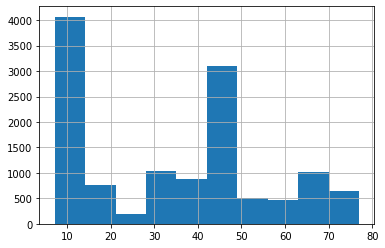

In [ ]:
# OUTLIERS DETECTION USING HISTOGRAM
exchange_rates['Dexinus'].hist()
plt.show()

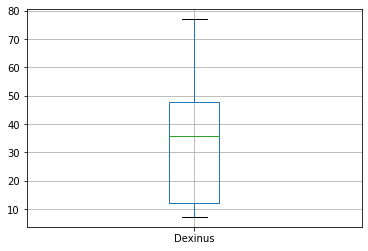

In [ ]:

# OUTLIERS DEYECTION USING BOXPLOT
exchange_rates.boxplot(column=['Dexinus'])
plt.show()

### 3.2 DUMMIES CREATION


In [ ]:
exchange_rates['Date'] = pd.to_datetime(exchange_rates.Date,format = '%b-%y')
exchange_rates['month'] = exchange_rates.Date.dt.strftime("%b") # month extraction
exchange_rates['year'] = exchange_rates.Date.dt.strftime("%y") # year extraction
exchange_rates['Day'] = exchange_rates.Date.dt.strftime("%d") # day extraction
exchange_rates

,Date,Dexinus,month,year,Day
0,1973-01-02,8.02,Jan,73,02
1,1973-01-03,8.02,Jan,73,03
2,1973-01-04,8.00,Jan,73,04
3,1973-01-05,8.01,Jan,73,05
4,1973-01-08,8.00,Jan,73,08
...,...,...,...,...,...
12644,2021-06-21,74.18,Jun,21,21
12645,2021-06-22,74.37,Jun,21,22
12646,2021-06-23,74.13,Jun,21,23
12647,2021-06-24,74.14,Jun,21,24


In [ ]:
month_dummies = pd.DataFrame(pd.get_dummies(exchange_rates['month']))
exchange_rates1 = pd.concat([exchange_rates,month_dummies],axis = 1)
exchange_rates1 

,Date,Dexinus,month,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1973-01-02,8.02,Jan,73,02,0,0,0,0,1,0,0,0,0,0,0,0
1,1973-01-03,8.02,Jan,73,03,0,0,0,0,1,0,0,0,0,0,0,0
2,1973-01-04,8.00,Jan,73,04,0,0,0,0,1,0,0,0,0,0,0,0
3,1973-01-05,8.01,Jan,73,05,0,0,0,0,1,0,0,0,0,0,0,0
4,1973-01-08,8.00,Jan,73,08,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12644,2021-06-21,74.18,Jun,21,21,0,0,0,0,0,0,1,0,0,0,0,0
12645,2021-06-22,74.37,Jun,21,22,0,0,0,0,0,0,1,0,0,0,0,0
12646,2021-06-23,74.13,Jun,21,23,0,0,0,0,0,0,1,0,0,0,0,0
12647,2021-06-24,74.14,Jun,21,24,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
exchange_rates1["t"] = np.arange(1,12650)
exchange_rates1["t_squared"] = exchange_rates1["t"]*exchange_rates1["t"]
exchange_rates1["log_Dexinus"] = np.log(exchange_rates["Dexinus"])

In [ ]:
exchange_rates1.head(10)

,Date,Dexinus,month,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Dexinus
0,1973-01-02,8.02,Jan,73,02,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2.081938
1,1973-01-03,8.02,Jan,73,03,0,0,0,0,1,0,0,0,0,0,0,0,2,4,2.081938
2,1973-01-04,8.00,Jan,73,04,0,0,0,0,1,0,0,0,0,0,0,0,3,9,2.079442
3,1973-01-05,8.01,Jan,73,05,0,0,0,0,1,0,0,0,0,0,0,0,4,16,2.080691
4,1973-01-08,8.00,Jan,73,08,0,0,0,0,1,0,0,0,0,0,0,0,5,25,2.079442
5,1973-01-09,8.00,Jan,73,09,0,0,0,0,1,0,0,0,0,0,0,0,6,36,2.079442
6,1973-01-10,8.00,Jan,73,10,0,0,0,0,1,0,0,0,0,0,0,0,7,49,2.079442
7,1973-01-11,8.00,Jan,73,11,0,0,0,0,1,0,0,0,0,0,0,0,8,64,2.079442
8,1973-01-12,8.00,Jan,73,12,0,0,0,0,1,0,0,0,0,0,0,0,9,81,2.079442
9,1973-01-15,8.00,Jan,73,15,0,0,0,0,1,0,0,0,0,0,0,0,10,100,2.079442


# 4.DATA PREPARATION

1.   creating copy of data
2.   resampling data



In [ ]:
exchange_rates2 = exchange_rates1.copy()
exchange_rates2

,Date,Dexinus,month,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Dexinus
0,1973-01-02,8.02,Jan,73,02,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2.081938
1,1973-01-03,8.02,Jan,73,03,0,0,0,0,1,0,0,0,0,0,0,0,2,4,2.081938
2,1973-01-04,8.00,Jan,73,04,0,0,0,0,1,0,0,0,0,0,0,0,3,9,2.079442
3,1973-01-05,8.01,Jan,73,05,0,0,0,0,1,0,0,0,0,0,0,0,4,16,2.080691
4,1973-01-08,8.00,Jan,73,08,0,0,0,0,1,0,0,0,0,0,0,0,5,25,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12644,2021-06-21,74.18,Jun,21,21,0,0,0,0,0,0,1,0,0,0,0,0,12645,159896025,4.306495
12645,2021-06-22,74.37,Jun,21,22,0,0,0,0,0,0,1,0,0,0,0,0,12646,159921316,4.309053
12646,2021-06-23,74.13,Jun,21,23,0,0,0,0,0,0,1,0,0,0,0,0,12647,159946609,4.305820
12647,2021-06-24,74.14,Jun,21,24,0,0,0,0,0,0,1,0,0,0,0,0,12648,159971904,4.305955


## Resampling
- Resampling involves changing the frequencey of time series observations.
- Down sampling
- up sampling

In [ ]:
# UPSAMPLING DATA
upsampling = pd.read_csv("/content/drive/MyDrive/project 1/DEXINUS.csv",header = 0,index_col=['observation_date'],parse_dates=['observation_date'])

In [ ]:

# CHANGE COLUMN NAMES TO SIMPLIFY AND INDENTIFIABLE NAMES
upsampling = upsampling.rename({'observation_date':'Date'},axis = 1).rename({'DEXINUS':'Dexinus'},axis=1)

In [ ]:
upsampling.ffill(inplace = True)

In [ ]:
upsampling_data = upsampling.resample("H").mean()

In [ ]:
upsampling_data = upsampling_data.interpolate(method = 'linear')

In [ ]:
upsampling_data.head()

,Dexinus
observation_date,
1973-01-02 00:00:00,8.02
1973-01-02 01:00:00,8.02
1973-01-02 02:00:00,8.02
1973-01-02 03:00:00,8.02
1973-01-02 04:00:00,8.02


In [ ]:


# DOWNSAMPLING DATA
downsampling = pd.read_csv("/content/drive/MyDrive/project 1/DEXINUS.csv",header = 0,index_col=['observation_date'],parse_dates=['observation_date'],)

In [ ]:
# CHANGE COLUMN NAMES TO SIMPLIFY AND INDENTIFIABLE NAMES
downsampling = downsampling.rename({'observation_date':'Date'},axis = 1).rename({'DEXINUS':'Dexinus'},axis=1)

In [ ]:
downsampling.ffill(inplace = True)

In [ ]:
# DOWNSAMPLING FOR MONTHLY FREQUENCY
downsampling_data = downsampling.resample('M').mean()

In [ ]:
downsampling_data.head()

,Dexinus
observation_date,
1973-01-31,8.004091
1973-02-28,7.783500
1973-03-31,7.546818
1973-04-30,7.546190
1973-05-31,7.489130


###### INTRODUCTION:-
When India got independence in the year 1947 there are no outstanding credits on the balance sheet of India.
The value of 1 INR could be taken as 1 USD, considering that the nation balance sheet was free any credit or debit.
The value of 1 INR was 4.16 when the Indian constitution came into existance. This value continued till 1966.
###### Reason for the fall of Indian Currency:-
The situation was worsened by the 1962 war of India and china, followed by the war of India and Pakistan, and the drought that had hit the nation in 1966. All these turned the exchange rate of 1 Dollar to 7.50 INR by the year 1967.

In [ ]:
exchange_rates1 = exchange_rates1.set_index('Date')
exchange_rates1

,Dexinus,month,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Dexinus
Date,,,,,,,,,,,,,,,,,,,
1973-01-02,8.02,Jan,73,02,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2.081938
1973-01-03,8.02,Jan,73,03,0,0,0,0,1,0,0,0,0,0,0,0,2,4,2.081938
1973-01-04,8.00,Jan,73,04,0,0,0,0,1,0,0,0,0,0,0,0,3,9,2.079442
1973-01-05,8.01,Jan,73,05,0,0,0,0,1,0,0,0,0,0,0,0,4,16,2.080691
1973-01-08,8.00,Jan,73,08,0,0,0,0,1,0,0,0,0,0,0,0,5,25,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,74.18,Jun,21,21,0,0,0,0,0,0,1,0,0,0,0,0,12645,159896025,4.306495
2021-06-22,74.37,Jun,21,22,0,0,0,0,0,0,1,0,0,0,0,0,12646,159921316,4.309053
2021-06-23,74.13,Jun,21,23,0,0,0,0,0,0,1,0,0,0,0,0,12647,159946609,4.305820


# 5.DATA VISUALIZATION

LINE PLOT

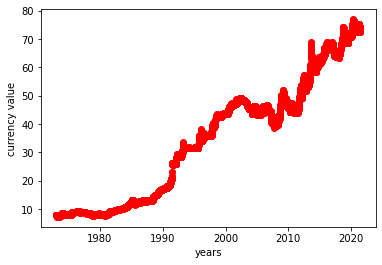

In [ ]:
# MATPLOTLIB VISUALIZATION
# line chart visualization
x = exchange_rates['Date']
y = exchange_rates['Dexinus']
# creating the line chart
plt.plot(x,y,'ro')
# adding the titles to the line chart
plt.xlabel("years")
plt.ylabel("currency value")
# display the line chart
plt.show()

LINE PLOT FOR 1O YEARS OF INTERVAL DATA

[]

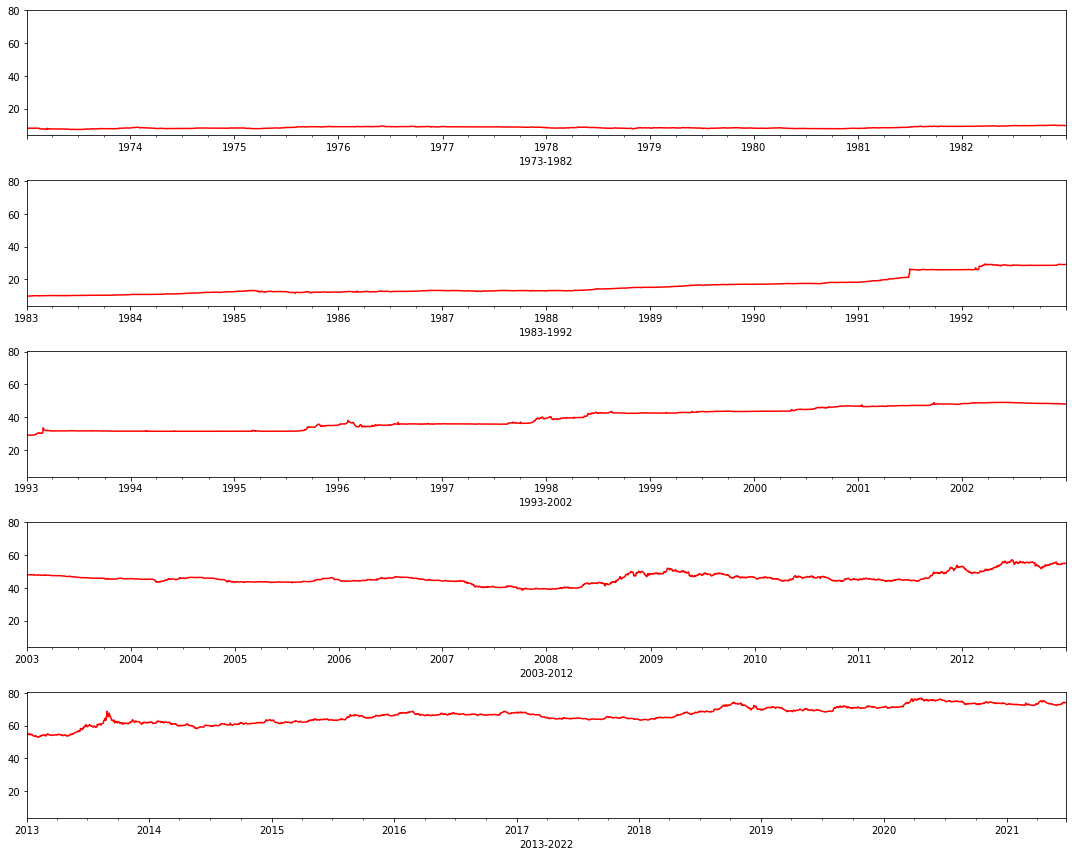

In [ ]:
fig, ax = plt.subplots(5, 1, figsize = (15,12),sharey=True)
exchange_rates1['1973':'1982']['Dexinus'].plot(xlabel = "1973-1982",color = 'r',ax=ax[0])
exchange_rates1['1983':'1992']['Dexinus'].plot(xlabel = "1983-1992",color = 'r',ax=ax[1])
exchange_rates1['1993':'2002']['Dexinus'].plot(xlabel = "1993-2002",color = "r",ax=ax[2])
exchange_rates1['2003':'2012']['Dexinus'].plot(xlabel = "2003-2012",color = "r",ax=ax[3])
exchange_rates1['2013':'2022']['Dexinus'].plot(xlabel = "2013-2022",color = "r",ax=ax[4])
plt.tight_layout()
plt.plot()

######Further fall in Rupee value:- 1973 Oil Crisis
INR value fell to 8.10 in 1974 because of Oil Shock that took place in 1973 due to the Organization of Arab Petroleum Exporting Countries(OAPEC) to reduce production.
To combat the situation and the subsequent political crisis, India had to borrow foreign currency. This resulted in the fall of the Indian currency value and reached a value as high as 17.50 in 1990 shown in second subplot.
#####The Economic Crisis in 1991
Intrest Payment accounted for 39% of the revenue that the government collected at the time due to this India declared as a defaulter in the international market. This crisis called for a devaluation of the Indian currency.
The devaluation turned the exchange rate of 1 USD to 25.92 INR in the year 1992 this can be absoved in second subplot.
The subplots 3 and 4 telling that the exchange rate of INR keep on increasing from 1992 with some flucuations.
Abserve the subplot 4, In the period between 2002 to 2007 the rupee stopped declining and stabilised ranging between RS.44-Rs.48. In late 2007, the Indian Ruppe reached to 39 INR, on account sustained foreign investment flows into the county.
In 2004 the Dollar price was 45.32INR, and in the next 10 years it rose to 62.33.
Due to stagnant reforms and declining foreign investment again rupee statred falls in early 2013. The INR value continuesly increasing from 2013 to till now with some flucuations.

BAR PLOT

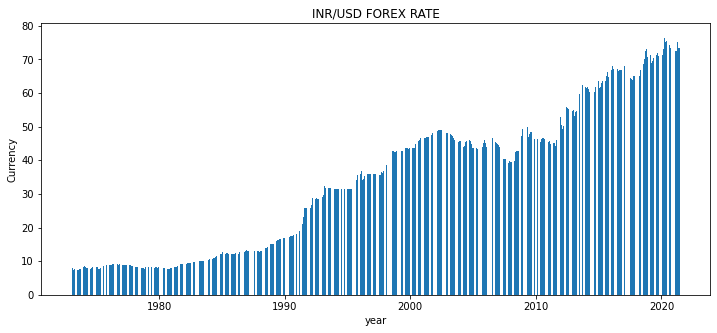

In [ ]:
# bar chart visualization
plt.figure(figsize=(12,5))
# creating the bar plot
plt.bar(x,y)
# creating the title of the bar chart
plt.title('INR/USD FOREX RATE')
plt.xlabel('year')
plt.ylabel('Currency')
# display the bar chart
plt.show()

BOX PLOT FOR 10 YEARS OF INVERTAL DATA 

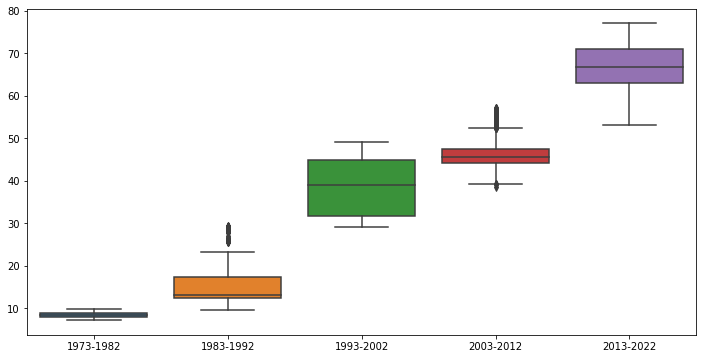

In [ ]:
data1 = exchange_rates1.loc['1973':'1982']['Dexinus']
data2 = exchange_rates1.loc['1983':'1992']['Dexinus']
data3 = exchange_rates1.loc['1993':'2002']['Dexinus']
data4 = exchange_rates1.loc['2003':'2012']['Dexinus']
data5 = exchange_rates1.loc['2013':'2022']['Dexinus']
d = {'1973-1982':data1, '1983-1992':data2, '1993-2002':data3, '2003-2012':data4,'2013-2022':data5}
plot_data = pd.DataFrame(data=d)
plt.figure(figsize=(12,6))
sns.boxplot(data = plot_data)
plt.show()

SCATTER PLOT 

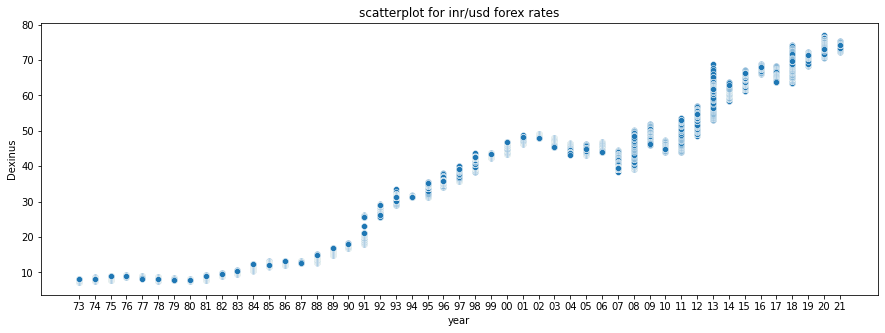

In [ ]:
# SEABORN LIBRARY VISUALIZATION
# scatter plot visualization
# creating the scatterplot and title for the scatter plot
plt.figure(figsize=(15,5))
sns.scatterplot(x="year",y = "Dexinus",data = exchange_rates1).set_title('scatterplot for inr/usd forex rates')
plt.show()

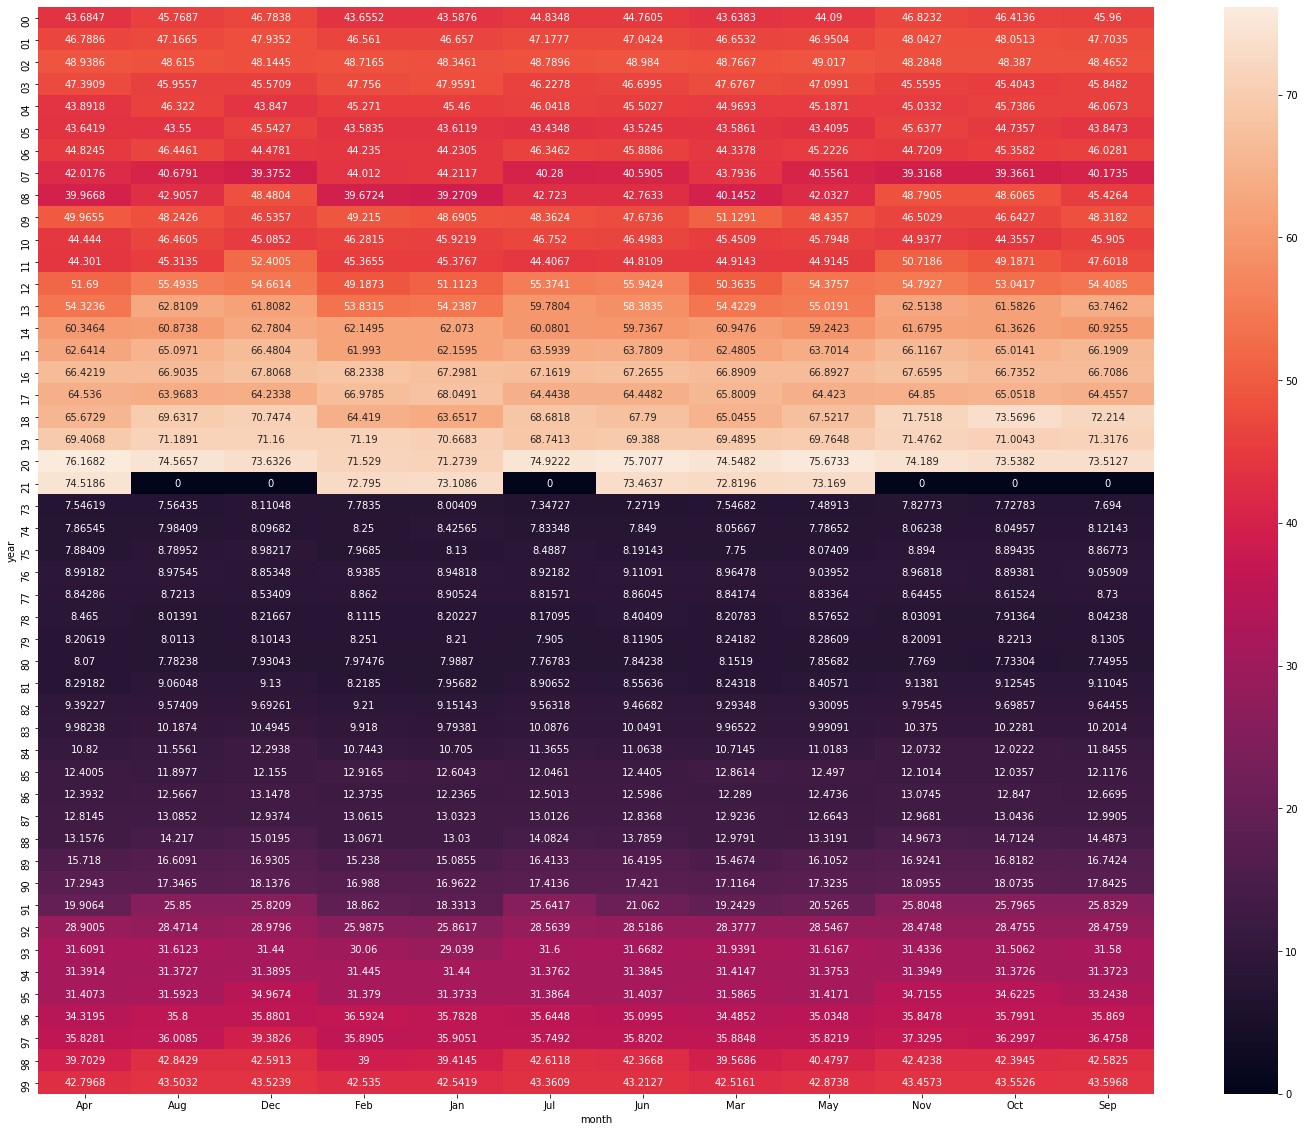

In [ ]:
# HEATMAP VISUALIZATION
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
heatmap_year_month = pd.pivot_table(data = exchange_rates,values='Dexinus',index = 'year',columns = 'month',
                                    aggfunc = 'mean',fill_value = 0)
sns.heatmap(heatmap_year_month,annot = True,fmt = 'g')

Annual and Month wise box plot

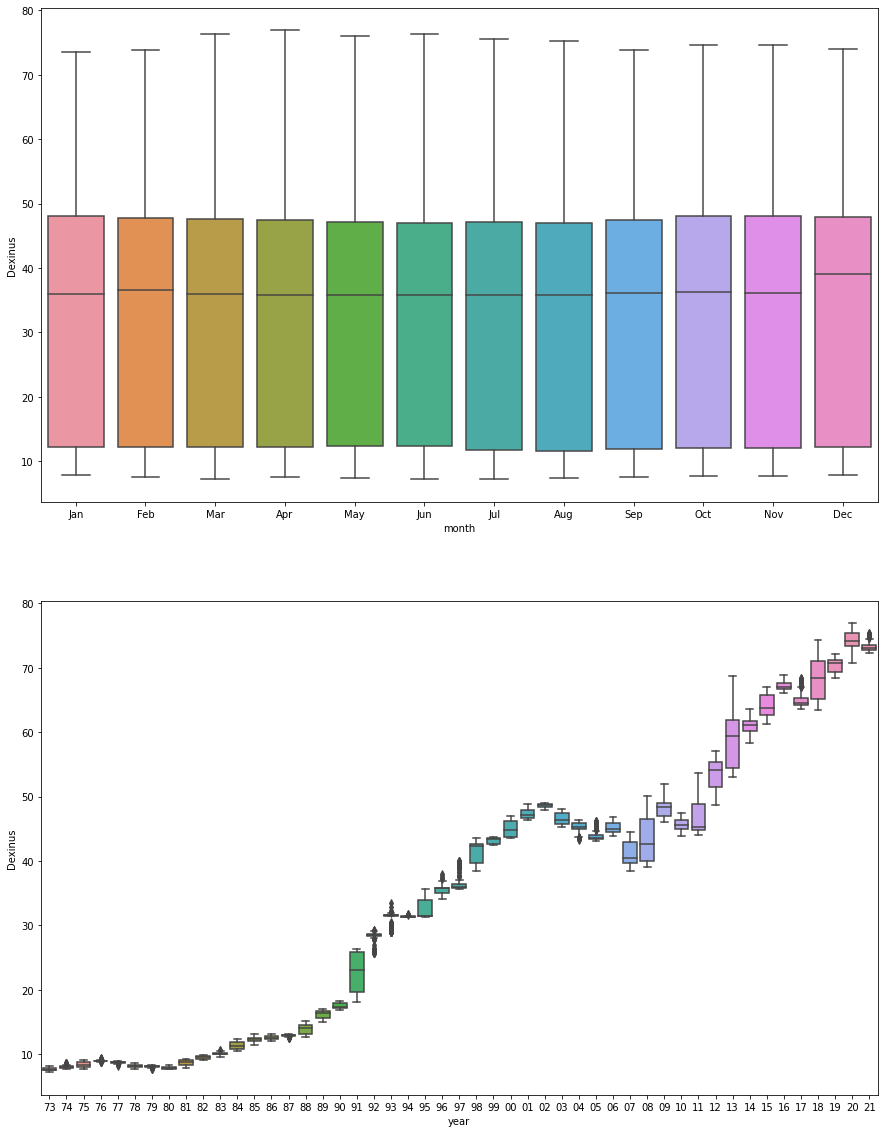

In [ ]:
# BOX PLOT VISUALIZATIONS
# creating the box plot
plt.figure(figsize=(15,20))
plt.subplot(211)
# creating the boxplot for month 
sns.boxplot(x='month',y='Dexinus',data=exchange_rates)
# creating the boxplot for year
plt.subplot(212)
sns.boxplot(x='year',y='Dexinus',data=exchange_rates)
plt.show()


LINE PLOT

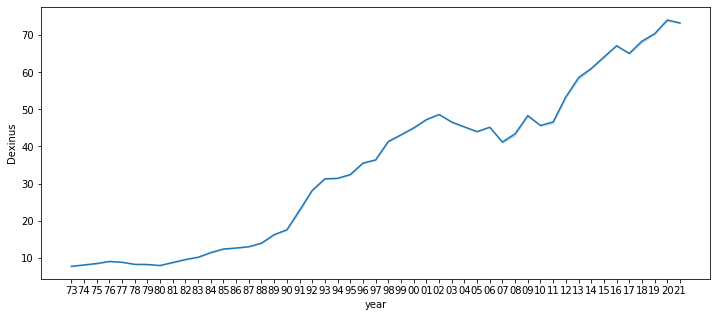

In [ ]:
# LINEPLOT VISUALIZATIONS
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='Dexinus',data = exchange_rates)

HISTOGRAM

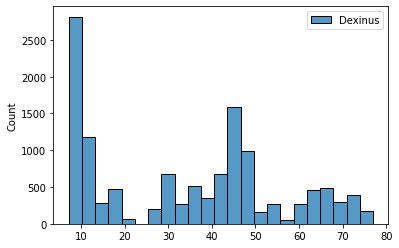

In [ ]:
# HISTOGRAM
import seaborn as sns
sns.histplot(data=exchange_rates)

KERNEL DENSITY PLOT

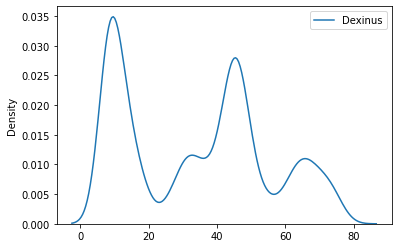

In [ ]:
# KERNEL DENSITY PLOT
sns.kdeplot(data = exchange_rates)

LAG PLOT

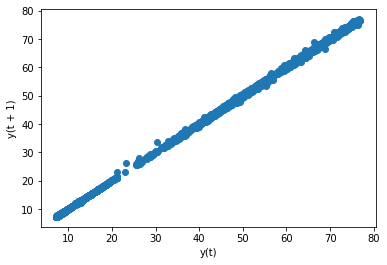

In [ ]:

# LAG PLOT
from pandas.plotting import lag_plot
rates = pd.read_csv("/content/drive/MyDrive/project 1/DEXINUS.csv",header=0,index_col=0,parse_dates=True)
lag_plot(rates)
plt.show()

BAR PLOT 

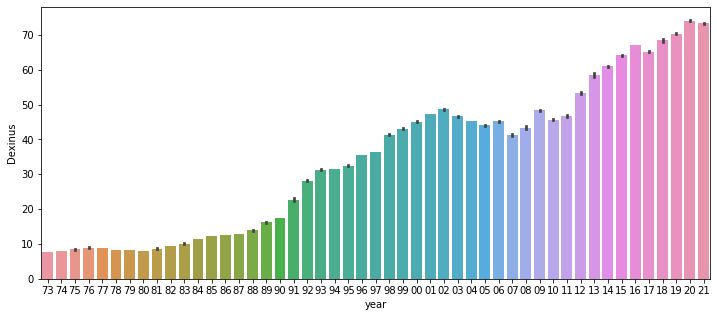

In [ ]:
# BAR PLOT
plt.figure(figsize=(12,5))
sns.barplot(x='year',y='Dexinus',data=exchange_rates1)
plt.show()

DECOMPOSITION PLOT

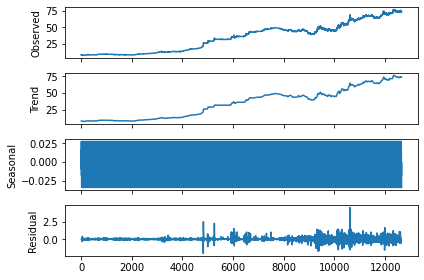

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
sea_dec = seasonal_decompose(exchange_rates.Dexinus,freq=25)
sea_dec.plot()
plt.show()

# 6.CHECKING FOR STATIONARY DATA

- The null hypothesis: the distribution is non-stationary.
- The alternative hypothesis: the distribution is stationary.
The p-value determines the result of the test. If it is smaller than a critical threshold of 0.05 or 0.01, we reject the null hypothesis and conclude that the series is stationary. Otherwise, we fail to reject the null and conclude the series is non-stationary.
I am implementing this test by using the "adfuller" function under "statsmodels".

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# ADF TEST
def adfuller_test(data):
  results = adfuller(data)
  labels = ['ADF Test Statistic','p-value','No.of Lags used','No.of observations used']
  for value,label in zip(results,labels):
    print(label+' : '+str(value))
    if results[1] <= 0.05:
      print("Data is Stationary")
    else:
        print("Data is not Stationary")

In [ ]:
adfuller_test(exchange_rates1["Dexinus"])

ADF Test Statistic : 0.6320006223926237
Data is not Stationary
p-value : 0.9883783969303007
Data is not Stationary
No.of Lags used : 37
Data is not Stationary
No.of observations used : 12611
Data is not Stationary


- From Dicky-Fuller test it is conclude that the data is non-stationary
5.1 Transforming non-stationary series to make it stationary
- one method to transform non-stationary data is differencing. This process involves taking the difference of consecutive observations. Pandas has "diff" function to this.

In [ ]:
exchange_rates1['diff_1'] = exchange_rates1['Dexinus'].diff(periods = 1)
# exchange_rates1['diff1'] = exchange_rates1['DEXINUS']-exchange_rates1['DEXINUS'].shift(1)
exchange_rates1

,Dexinus,month,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Dexinus,diff_1
Date,,,,,,,,,,,,,,,,,,,,
1973-01-02,8.02,Jan,73,02,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2.081938,NaN
1973-01-03,8.02,Jan,73,03,0,0,0,0,1,0,0,0,0,0,0,0,2,4,2.081938,0.00
1973-01-04,8.00,Jan,73,04,0,0,0,0,1,0,0,0,0,0,0,0,3,9,2.079442,-0.02
1973-01-05,8.01,Jan,73,05,0,0,0,0,1,0,0,0,0,0,0,0,4,16,2.080691,0.01
1973-01-08,8.00,Jan,73,08,0,0,0,0,1,0,0,0,0,0,0,0,5,25,2.079442,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,74.18,Jun,21,21,0,0,0,0,0,0,1,0,0,0,0,0,12645,159896025,4.306495,0.04
2021-06-22,74.37,Jun,21,22,0,0,0,0,0,0,1,0,0,0,0,0,12646,159921316,4.309053,0.19
2021-06-23,74.13,Jun,21,23,0,0,0,0,0,0,1,0,0,0,0,0,12647,159946609,4.305820,-0.24


In [ ]:
adfuller_test(exchange_rates1['diff_1'].dropna())

ADF Test Statistic : -19.05560259788793
Data is Stationary
p-value : 0.0
Data is Stationary
No.of Lags used : 36
Data is Stationary
No.of observations used : 12611
Data is Stationary


When we apply adfuller test on the original data of Dexinus, the p-value was close to 1. After differencing, the p-value is flat 2.749e-30, suggesting we reject the null hypothesis and conclude the series is now stationary.

PLOT FOR DIFFERENCED DATA

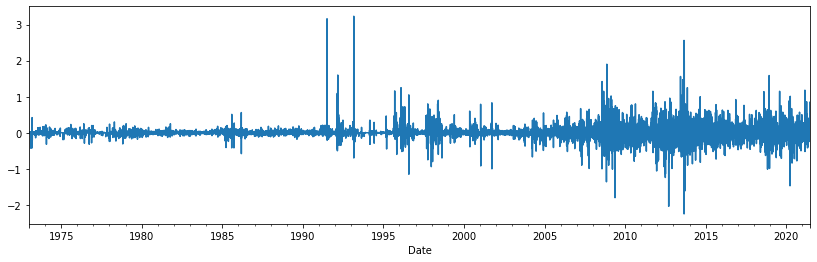

In [ ]:
exchange_rates1['diff_1'].plot(figsize=(14,4))

DECOMPOSITION DATA FOR DIFFERENCED DATA

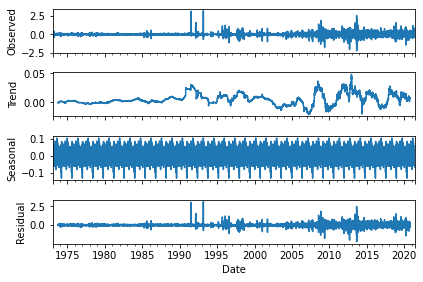

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
sea_dec = seasonal_decompose(exchange_rates1['diff_1'].dropna(), freq = 365)
sea_dec.plot()
plt.show()

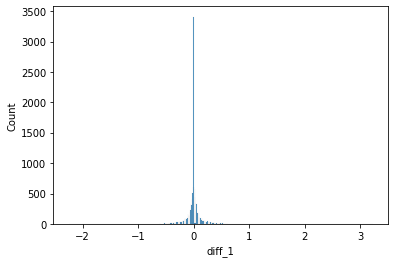

In [ ]:
sns.histplot(exchange_rates1['diff_1'])


### Another case:
- However, some distributions may not be so easy to deal with. Look at the decomposition plot the trend is non-linear.
- Before taking the difference, we have to account for that obvious non-linear trend. Otherwise, the series will still be non- stationary.
- To remove non-linearity, we will use the logarithmic function np.log and then, take the first-order difference:

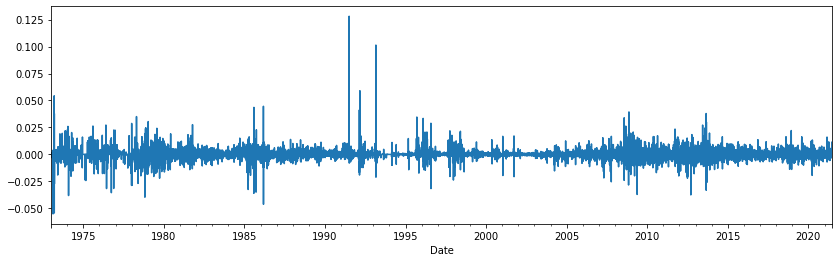

In [ ]:
exchange_rates1['transformed_data']= pd.Series(np.log(exchange_rates1["Dexinus"])).diff().dropna()
exchange_rates1['transformed_data'].plot(figsize=(14,4))

In [ ]:
adfuller_test(exchange_rates1['transformed_data'].dropna())

ADF Test Statistic : -37.438219906910376
Data is Stationary
p-value : 0.0
Data is Stationary
No.of Lags used : 8
Data is Stationary
No.of observations used : 12639
Data is Stationary


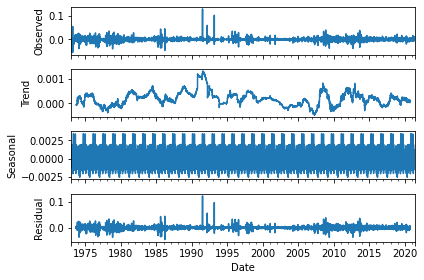

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
sea_dec = seasonal_decompose(exchange_rates1['transformed_data'].dropna(), freq = 365)
sea_dec.plot()
plt.show()

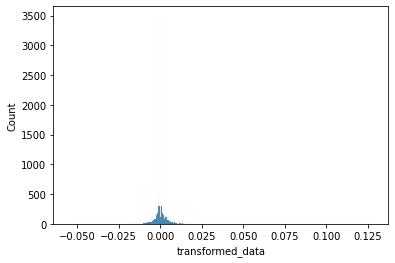

In [ ]:
sns.histplot(exchange_rates1['transformed_data'])

# 7.MODEL BUILDING 

In [ ]:
#DIVIDE THE TRAIN AND TEST SPLIT BY 30% DATASET
Train = exchange_rates1.head(8854)
Test = exchange_rates1.tail(3795)

In [ ]:
# MEAN ABSOLUTE PERCENTAGE ERROR (MAPE)
def MAPE(org,pred):
  temp = np.abs((org-pred)/org)*100
  return np.mean(temp)


### LINEAR MODEL


In [ ]:
linear_model = smf.ols('Dexinus~t',data = Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Dexinus'])-np.array(pred_linear))**2))
rmse_linear

5.628173515592914

###EXPONENTIAL MODEL

In [ ]:
Exponential = smf.ols('log_Dexinus~t',data = Train).fit()
pred_Exp = pd.Series(Exponential.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Dexinus'])-np.array(pred_Exp))**2))
rmse_Exp

54.60229172000521

###QUADRATIC MODEL

In [ ]:
Quad = smf.ols('Dexinus~t+t_squared',data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['t','t_squared']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Dexinus'])-np.array(pred_Quad))**2))
rmse_Quad

18.166699513444954

ADDITIVE SEASONALITY MODEL

In [ ]:
add_sea = smf.ols('Dexinus~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Dexinus'])-np.array(pred_add_sea))**2))
rmse_add_sea

35.94914664014225

ADDITIVE SEASONALITY QUADRATIC MODEL 

In [ ]:
add_sea_Quad = smf.ols('Dexinus~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_add_sea_Quad = pd.Series(add_sea_Quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea_Quad = np.sqrt(np.mean((np.array(Test['Dexinus'])-np.array(pred_add_sea_Quad))**2))
rmse_add_sea_Quad

18.171344439857

###MULTIPLICATIVE SEASONALITY MODEL

In [ ]:
mul_sea = smf.ols('log_Dexinus~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_sea = np.sqrt(np.mean((np.array(Test['Dexinus'])-np.array(pred_mul_sea))**2))
rmse_mul_sea


56.296280600532725

###MULTIPLICATIVE ADDITIVE SEASONALITY MODEL

In [ ]:
mul_add_sea = smf.ols('log_Dexinus~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(Test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_add_sea = np.sqrt(np.mean((np.array(Test['Dexinus'])-np.array(pred_mul_add_sea))**2))
rmse_mul_add_sea


54.60207375008393

MULTIPLICATIVE ADDITIVE SEASONALITY QUADRATIC MODEL

In [ ]:
mul_add_sea_Quad = smf.ols('log_Dexinus~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_mul_add_sea_Quad = pd.Series(mul_add_sea_Quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_add_sea_Quad = np.sqrt(np.mean((np.array(Test['Dexinus'])-np.array(pred_mul_add_sea_Quad))**2))
rmse_mul_add_sea_Quad

54.49647138358086

In [ ]:
# compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_Quad","rmse_mul_sea","rmse_mul_add_sea","rmse_mul_add_sea_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_Quad,rmse_mul_sea,rmse_mul_add_sea,rmse_mul_add_sea_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,5.628174
2,rmse_Quad,18.166700
4,rmse_add_sea_Quad,18.171344
3,rmse_add_sea,35.949147
7,rmse_mul_add_sea_Quad,54.496471
6,rmse_mul_add_sea,54.602074
1,rmse_Exp,54.602292
5,rmse_mul_sea,56.296281


### SIMPLE EXPONENTIAL METHOD


In [ ]:
ses_model = SimpleExpSmoothing(Train['Dexinus']).fit(smoothing_level = 0.8)
pred_ses = ses_model.predict(start=Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Dexinus)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


32.31140623617437

### HOLT METHOD

In [ ]:
holt_model = Holt(Train['Dexinus']).fit(smoothing_level = 0.8)
pred_holt = holt_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_holt,Test.Dexinus)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


42.22869297767452

### EXPONENTIAL SMOOTHING


In [ ]:
es_model = ExponentialSmoothing(Train['Dexinus'],seasonal='mul',trend = 'add',seasonal_periods=12).fit()
pred_es_model = es_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_es_model,Test.Dexinus)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


37.0380449906639

In [ ]:
# WE CHOOSE SIMPLE EXPONENTIAL METHOD BECAUSE OF MORE ACCURACY
sim_model = SimpleExpSmoothing(exchange_rates1['Dexinus']).fit(smoothing_level = 0.8)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


In [ ]:
#FORECAST THE CURRENCY FOR NEXT 30 DAYS
sim_model.forecast(30)

2021-06-28    74.141194
2021-06-29    74.141194
2021-06-30    74.141194
2021-07-01    74.141194
2021-07-02    74.141194
2021-07-05    74.141194
2021-07-06    74.141194
2021-07-07    74.141194
2021-07-08    74.141194
2021-07-09    74.141194
2021-07-12    74.141194
2021-07-13    74.141194
2021-07-14    74.141194
2021-07-15    74.141194
2021-07-16    74.141194
2021-07-19    74.141194
2021-07-20    74.141194
2021-07-21    74.141194
2021-07-22    74.141194
2021-07-23    74.141194
2021-07-26    74.141194
2021-07-27    74.141194
2021-07-28    74.141194
2021-07-29    74.141194
2021-07-30    74.141194
2021-08-02    74.141194
2021-08-03    74.141194
2021-08-04    74.141194
2021-08-05    74.141194
2021-08-06    74.141194
Freq: B, dtype: float64

### AUTO REGRESION MODEL

In [ ]:
pip install statsmodels

In [ ]:
from statsmodels.tsa.ar_model import AR

In [ ]:
Train.head(5)

,Dexinus,month,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Dexinus,diff_1,transformed_data
Date,,,,,,,,,,,,,,,,,,,,,
1973-01-02,8.02,Jan,73,02,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2.081938,NaN,NaN
1973-01-03,8.02,Jan,73,03,0,0,0,0,1,0,0,0,0,0,0,0,2,4,2.081938,0.00,0.000000
1973-01-04,8.00,Jan,73,04,0,0,0,0,1,0,0,0,0,0,0,0,3,9,2.079442,-0.02,-0.002497
1973-01-05,8.01,Jan,73,05,0,0,0,0,1,0,0,0,0,0,0,0,4,16,2.080691,0.01,0.001249
1973-01-08,8.00,Jan,73,08,0,0,0,0,1,0,0,0,0,0,0,0,5,25,2.079442,-0.01,-0.001249


In [ ]:

Test.head(5)

,Dexinus,month,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Dexinus,diff_1,transformed_data
Date,,,,,,,,,,,,,,,,,,,,,
2006-12-11,44.69,Dec,06,11,0,0,1,0,0,0,0,0,0,0,0,0,8855,78411025,3.799750,0.16,0.003587
2006-12-12,44.70,Dec,06,12,0,0,1,0,0,0,0,0,0,0,0,0,8856,78428736,3.799974,0.01,0.000224
2006-12-13,44.68,Dec,06,13,0,0,1,0,0,0,0,0,0,0,0,0,8857,78446449,3.799526,-0.02,-0.000448
2006-12-14,44.56,Dec,06,14,0,0,1,0,0,0,0,0,0,0,0,0,8858,78464164,3.796837,-0.12,-0.002689
2006-12-15,44.54,Dec,06,15,0,0,1,0,0,0,0,0,0,0,0,0,8859,78481881,3.796388,-0.02,-0.000449


In [ ]:
# AUTO REGRESSION ERROR ACCURACY
ar = AR(Train['Dexinus']).fit()
pred_ar = ar.predict(start = Test.index[0],end = Test.index[-1])

MAPE(pred_ar,Test.Dexinus)

13.258837272756779

In [ ]:
# AR MODEL FITTING 
ar_model = AR(exchange_rates1['Dexinus']).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


In [ ]:
# FORECAST FOR 30 DAYS IN AUTO REGRESSION 
ARFORECAST = ar_model.predict(12649,12679)
print(ARFORECAST)
ARFORECAST.to_csv("predicted1.csv")

2021-06-28    74.170989
2021-06-29    74.206107
2021-06-30    74.216650
2021-07-01    74.213949
2021-07-02    74.220085
2021-07-05    74.230881
2021-07-06    74.256721
2021-07-07    74.290547
2021-07-08    74.313343
2021-07-09    74.306404
2021-07-12    74.305834
2021-07-13    74.321051
2021-07-14    74.341005
2021-07-15    74.385747
2021-07-16    74.374823
2021-07-19    74.388406
2021-07-20    74.370227
2021-07-21    74.350490
2021-07-22    74.385921
2021-07-23    74.394416
2021-07-26    74.407546
2021-07-27    74.418303
2021-07-28    74.422448
2021-07-29    74.428262
2021-07-30    74.425912
2021-08-02    74.447608
2021-08-03    74.448963
2021-08-04    74.435667
2021-08-05    74.436544
2021-08-06    74.413538
2021-08-09    74.404781
Freq: B, dtype: float64


### MOVING AVERAGE MODEL

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# MOVING AVERAGE ERROR ACCURACY
MA = ARIMA(Train['Dexinus'],order = (0,0,1)).fit()
pred_MA = MA.predict(start=Test.index[0],end = Test.index[-1])
MAPE(pred_MA,Test.Dexinus)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


142.74376056470794

In [ ]:
# MOVING AVERAGE MODEL FIT TO DATA
MA_model = ARIMA(exchange_rates1['Dexinus'],order = (0,0,1)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


In [ ]:
# PREDICT THE 30 DAYS OF THE MODEL
MAFORECAST = MA_model.predict(12649,12679)
MAFORECAST

2021-06-28    54.304451
2021-06-29    34.207607
2021-06-30    34.207607
2021-07-01    34.207607
2021-07-02    34.207607
2021-07-05    34.207607
2021-07-06    34.207607
2021-07-07    34.207607
2021-07-08    34.207607
2021-07-09    34.207607
2021-07-12    34.207607
2021-07-13    34.207607
2021-07-14    34.207607
2021-07-15    34.207607
2021-07-16    34.207607
2021-07-19    34.207607
2021-07-20    34.207607
2021-07-21    34.207607
2021-07-22    34.207607
2021-07-23    34.207607
2021-07-26    34.207607
2021-07-27    34.207607
2021-07-28    34.207607
2021-07-29    34.207607
2021-07-30    34.207607
2021-08-02    34.207607
2021-08-03    34.207607
2021-08-04    34.207607
2021-08-05    34.207607
2021-08-06    34.207607
2021-08-09    34.207607
Freq: B, dtype: float64

### ARIMA MODEL 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# ARIMA ERROR ACCURACY
Arima = ARIMA(Train['Dexinus'],order=(1,1,1)).fit()
pred_Arima = Arima.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_Arima,Test.Dexinus)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


1410426.7246483057

In [ ]:
# ARIMA MODEL DATA TO FIT
ARIMA_model = ARIMA(exchange_rates1['Dexinus'],order = (1,0,0)).fit()
ARIMA_model.summary2()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 -7978.2130
Dependent Variable: Dexinus          Log-Likelihood:      4003.3    
Date:               2021-08-16 05:37 Scale:               1.0000    
No. Observations:   12649            Method:              css-mle   
Df Model:           2                Sample:              01-02-1973
Df Residuals:       12647                                 06-25-2021
Converged:          1.0000           S.D. of innovations: 0.176     
No. Iterations:     26.0000          HQIC:                -7993.076 
AIC:                -8000.5490                                      
--------------------------------------------------------------------
                  Coef.  Std.Err.     t      P>|t|   [0.025   0.975]
--------------------------------------------------------------------
const            40.5059  30.0760     1.3468 0.1781 -18.4420 99.4538
ar.L1.Dexinus     1.0000   0.0000 46712.4897 0.0000   0.9999  1.0000
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.0000             0.0000           1.0000             0.0000
====================================================================

"""

In [ ]:
# FORECAST PREDICT FOR 30 DAYS
ARIMAFORECAST = ARIMA_model.predict(12649,12679)
ARIMAFORECAST

2021-06-28    74.139474
2021-06-29    74.138948
2021-06-30    74.138422
2021-07-01    74.137896
2021-07-02    74.137370
2021-07-05    74.136844
2021-07-06    74.136318
2021-07-07    74.135792
2021-07-08    74.135267
2021-07-09    74.134741
2021-07-12    74.134215
2021-07-13    74.133689
2021-07-14    74.133163
2021-07-15    74.132637
2021-07-16    74.132111
2021-07-19    74.131585
2021-07-20    74.131060
2021-07-21    74.130534
2021-07-22    74.130008
2021-07-23    74.129482
2021-07-26    74.128956
2021-07-27    74.128430
2021-07-28    74.127905
2021-07-29    74.127379
2021-07-30    74.126853
2021-08-02    74.126327
2021-08-03    74.125802
2021-08-04    74.125276
2021-08-05    74.124750
2021-08-06    74.124224
2021-08-09    74.123699
Freq: B, dtype: float64

### PYCARET MODEL 

In [ ]:
# installing the pycaret module 
!pip install pycaret[full]

     |████████████████████████████████| 264 kB 8.5 MB/s 
     |████████████████████████████████| 6.8 MB 19.3 MB/s 
     |████████████████████████████████| 1.3 MB 30.7 MB/s 
     |████████████████████████████████| 56 kB 6.1 MB/s 
     |████████████████████████████████| 2.0 MB 30.3 MB/s 
     |████████████████████████████████| 271 kB 73.9 MB/s 
     |████████████████████████████████| 167 kB 64.2 MB/s 
     |████████████████████████████████| 14.4 MB 63 kB/s 
     |████████████████████████████████| 108 kB 25.1 MB/s 
     |████████████████████████████████| 248 kB 24.8 MB/s 
     |████████████████████████████████| 1.7 MB 25.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 80 kB 11.8 MB/s 
     |████████████████████████████████| 101 kB 12.6 MB/s 
     |████████████████████████████████| 302 kB 71.9 MB/s 
     |██████████████████

In [ ]:
# using the pycaret module 
from pycaret.regression import *

In [ ]:
#DIVIDE THE TRAIN AND TEST SPLIT BY 30% DATASET
Train = exchange_rates1.head(8854)
Test = exchange_rates1.tail(3795)

In [ ]:
# initialize model 
s = setup(data = Train , test_data = Test,target = 'Dexinus',fold_strategy = 'timeseries',numeric_features = ['year'],
          fold = 3,transform_target = True ,log_experiment = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Dexinus
2,Original Data,"(8854, 21)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8854, 19)"


In [ ]:
# compare the models 
models = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,6.2639,78.4487,7.1936,-2.7120,0.3081,0.2239,0.0400
xgboost,Extreme Gradient Boosting,6.2747,78.4461,7.2032,-2.7343,0.3082,0.2241,1.5167
rf,Random Forest Regressor,6.2993,78.6565,7.2243,-2.7671,0.3098,0.2256,1.1467
gbr,Gradient Boosting Regressor,6.3312,79.0663,7.2519,-2.8137,0.3098,0.2256,0.5433
knn,K Neighbors Regressor,6.5617,80.7413,7.4500,-3.1391,0.3320,0.2465,0.8367
lightgbm,Light Gradient Boosting Machine,6.6503,81.4334,7.5388,-3.4141,0.3195,0.2352,0.2267
ada,AdaBoost Regressor,9.3759,127.7792,10.1202,-12.4695,0.4010,0.3018,0.3000
et,Extra Trees Regressor,11.3108,201.4013,12.6050,-35.6158,0.4771,0.3417,0.7367
catboost,CatBoost Regressor,12.7177,263.7963,14.1000,-51.8538,0.5447,0.3757,2.4500
llar,Lasso Least Angle Regression,19.0532,519.6217,19.5864,-100.3901,0.8941,0.5620,0.7500


In [ ]:
# predict the model 
prediction = predict_model(models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,10.6614,195.8316,13.994,-0.595,0.2356,0.16


In [ ]:
# create the model 
xgboost = create_model('xgboost',fold = 5)
print(xgboost)
dt = create_model('dt', fold = 5)
print(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2652,0.2400,0.4899,0.7333,0.0451,0.0261
1,2.4635,8.4181,2.9014,-2.5828,0.2095,0.1746
2,9.7356,125.3505,11.1960,-3.0947,0.4650,0.3290
3,7.8683,79.6866,8.9267,-3.4655,0.2310,0.1867
4,0.4916,0.4748,0.6891,0.8394,0.0146,0.0106
Mean,4.1649,42.8340,4.8406,-1.5141,0.1930,0.1454
SD,3.9075,50.9119,4.4048,1.8994,0.1609,0.1172


PowerTransformedTargetRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                presort='deprecated', random_state=123,
                                regressor=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                criterion='mse',
                                                                max_depth=None,
                                                                max_features=None,
                                                                ma

In [ ]:
# listout the parameters used in the  method
plot_model(dt,plot = 'parameter')

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


In [ ]:
# blending models 
blender = blend_models(estimator_list=[dt,xgboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8300,12.3768,3.5181,-1.7489,0.2776,0.2101
1,12.9622,210.1424,14.4963,-3.9864,0.5686,0.3973
2,3.0156,12.8210,3.5806,-2.4341,0.0782,0.0647
Mean,6.2693,78.4468,7.1983,-2.7231,0.3081,0.2240
SD,4.7332,93.1231,5.1605,0.9360,0.2014,0.1361


In [ ]:
print(blender.estimators_)

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameter

In [ ]:
# predict the model 
pred_final_blender = predict_model(blender,data = exchange_rates1)
pred_final_blender.to_csv('final_blender.csv')
pred_final_blender.describe()

,Dexinus,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Dexinus,diff_1,transformed_data,Label
count,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,12649.000000,1.264900e+04,12649.000000,12648.000000,12648.000000,12649.000000
mean,34.207112,0.083090,0.084038,0.083959,0.078109,0.085857,0.084117,0.082694,0.085698,0.085778,0.081271,0.084196,0.081192,6325.000000,5.333872e+07,3.274536,0.005228,0.000176,31.079564
std,21.113315,0.276028,0.277456,0.277338,0.268354,0.280163,0.277575,0.275430,0.279929,0.280046,0.273262,0.277693,0.273141,3651.596112,4.770737e+07,0.778504,0.176182,0.004744,16.845495
min,7.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.972691,-2.250000,-0.055178,7.192807
25%,12.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3163.000000,1.000457e+07,2.490723,-0.030000,-0.001024,12.073456
50%,35.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6325.000000,4.000562e+07,3.580459,0.000000,0.000000,35.888650
75%,47.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9487.000000,9.000317e+07,3.864092,0.030000,0.001225,47.682473
max,76.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12649.000000,1.599972e+08,4.343156,3.230000,0.128110,49.116831


In [ ]:
pred_final_blender[['Dexinus','Label']]

,Dexinus,Label
Date,,
1973-01-02,8.02,8.021966
1973-01-03,8.02,8.021966
1973-01-04,8.00,8.000037
1973-01-05,8.01,8.008960
1973-01-08,8.00,7.999815
...,...,...
2021-06-21,74.18,49.058581
2021-06-22,74.37,49.059740
2021-06-23,74.13,49.061383


### FBPROPHET MODEL 

In [ ]:
exchange_rates3 = exchange_rates.copy()
exchange_rates3 

,Date,Dexinus,month,year,Day
0,1973-01-02,8.02,Jan,73,02
1,1973-01-03,8.02,Jan,73,03
2,1973-01-04,8.00,Jan,73,04
3,1973-01-05,8.01,Jan,73,05
4,1973-01-08,8.00,Jan,73,08
...,...,...,...,...,...
12644,2021-06-21,74.18,Jun,21,21
12645,2021-06-22,74.37,Jun,21,22
12646,2021-06-23,74.13,Jun,21,23
12647,2021-06-24,74.14,Jun,21,24


In [ ]:
exchange_rates3.drop(columns=['month','year','Day'],axis = 1,inplace = True)
exchange_rates3

,Date,Dexinus
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [ ]:
# IMPORTANT LIBRARY 
import pandas as pd 
from fbprophet import Prophet
import plotly.graph_objs as go
import plotly.offline as py 
import numpy as np


In [ ]:
exchange_rates3 = exchange_rates3.rename(columns={'Date':'ds','Dexinus':'y'} )
exchange_rates3.head(5)

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [ ]:
model = Prophet()
model.fit(exchange_rates3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_data = model.make_future_dataframe(periods = 30,freq = 'D')
future_data.tail()

,ds
12674,2021-07-21
12675,2021-07-22
12676,2021-07-23
12677,2021-07-24
12678,2021-07-25


In [ ]:
forecast_data = model.predict(future_data)
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1973-01-02,7.533011,5.302401,9.575089,7.533011,7.533011,-0.049897,-0.049897,-0.049897,-0.087282,-0.087282,-0.087282,0.037385,0.037385,0.037385,0.0,0.0,0.0,7.483114
1,1973-01-03,7.534242,5.305902,9.600905,7.534242,7.534242,-0.059440,-0.059440,-0.059440,-0.092329,-0.092329,-0.092329,0.032889,0.032889,0.032889,0.0,0.0,0.0,7.474801
2,1973-01-04,7.535472,5.280517,9.580551,7.535472,7.535472,-0.064969,-0.064969,-0.064969,-0.093054,-0.093054,-0.093054,0.028085,0.028085,0.028085,0.0,0.0,0.0,7.470503
3,1973-01-05,7.536702,5.267023,9.799922,7.536702,7.536702,-0.081259,-0.081259,-0.081259,-0.104233,-0.104233,-0.104233,0.022974,0.022974,0.022974,0.0,0.0,0.0,7.455443
4,1973-01-08,7.540393,5.356947,9.663488,7.540393,7.540393,-0.087533,-0.087533,-0.087533,-0.093488,-0.093488,-0.093488,0.005956,0.005956,0.005956,0.0,0.0,0.0,7.452860


In [ ]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
12674,2021-07-21,76.624225,74.514002,78.821512
12675,2021-07-22,76.625759,74.364256,78.780655
12676,2021-07-23,76.617797,74.268104,78.902287
12677,2021-07-24,76.961480,74.805439,79.231326
12678,2021-07-25,76.966845,74.740641,79.377131


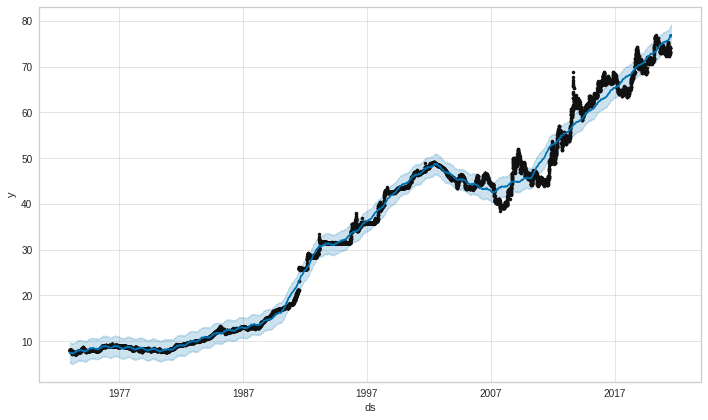

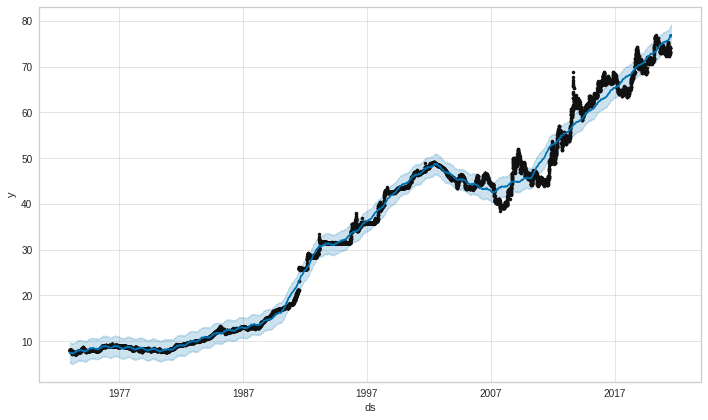

In [ ]:
model.plot(forecast_data)

  In the above graph The light blue color indicating the
upper and lower yhat levels, the dark blue color indicating the predicted values(yhat) and the black color line indicating the original data. We can see that the predicted data is close to the actual data. In the last 30 days we can observe that our model is predicted well.

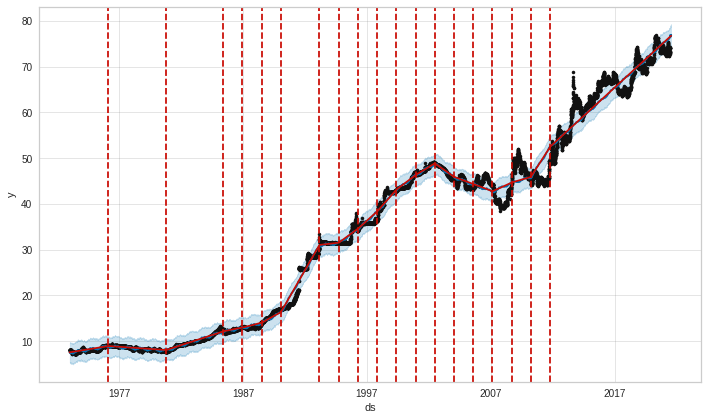

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), model, forecast_data)

The red dotted lines shows the rapid time change in the trend of dollar exchange rate.

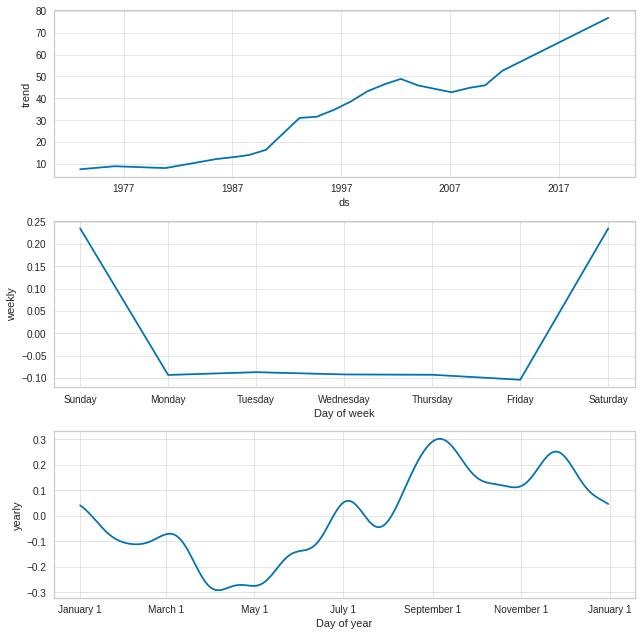

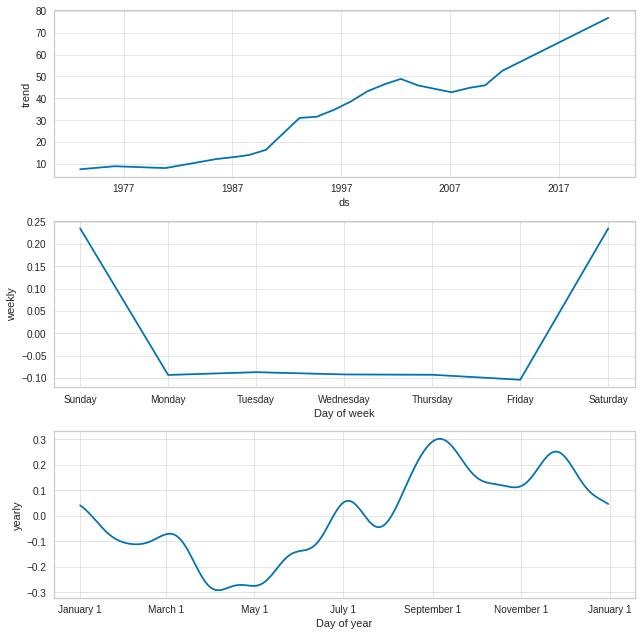

In [ ]:
### Visualize each and components[Trends - weekly,yearly]
model.plot_components(forecast_data)

In [ ]:
d = forecast_data.set_index('ds')[['yhat']].join(exchange_rates3.set_index('ds').y).reset_index()
d.tail(40)

,ds,yhat,y
12639,2021-06-14,76.301778,73.16
12640,2021-06-15,76.322101,73.35
12641,2021-06-16,76.331913,73.31
12642,2021-06-17,76.346731,74.16
12643,2021-06-18,76.351700,74.14
12644,2021-06-21,76.413468,74.18
12645,2021-06-22,76.437118,74.37
12646,2021-06-23,76.449492,74.13
12647,2021-06-24,76.466014,74.14
12648,2021-06-25,76.471751,74.14


In [ ]:
d.isnull().sum()

ds       0
yhat     0
y       30
dtype: int64

In [ ]:
# Removing the null values
d.dropna(inplace = True)
d.isnull().sum()

ds      0
yhat    0
y       0
dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
mean_squared_error(d.y, d.yhat)

2.946630035093659

In [ ]:
mean_absolute_error(d.y, d.yhat)

1.1202835245341187

In [ ]:

def mean_absolute_percentage_error(org,pred):
  return np.mean(np.abs((org-pred)/org)*100)

mean_absolute_percentage_error(org = d['y'],pred = d['yhat'])

3.220585607235674

#### cross validation of the model

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='8854 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 48 forecasts with cutoffs between 1997-04-27 00:00:00 and 2020-06-25 00:00:00


  0%|          | 0/48 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1997-04-28,36.004173,35.253718,36.688539,35.77,1997-04-27
1,1997-04-29,36.005627,35.291027,36.763863,35.77,1997-04-27
2,1997-04-30,36.004919,35.293799,36.722342,35.78,1997-04-27
3,1997-05-01,36.007202,35.258320,36.705687,35.77,1997-04-27
4,1997-05-02,36.010162,35.272942,36.732928,35.76,1997-04-27


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,13.372814,3.656886,2.709264,0.051559,0.042052,0.394484
1,38 days,13.360816,3.655245,2.708191,0.051567,0.042052,0.394884
2,39 days,13.394740,3.659882,2.704871,0.051511,0.041998,0.398599
3,40 days,13.399421,3.660522,2.706132,0.051582,0.042052,0.399566
4,41 days,13.478581,3.671319,2.718630,0.051828,0.042052,0.397899


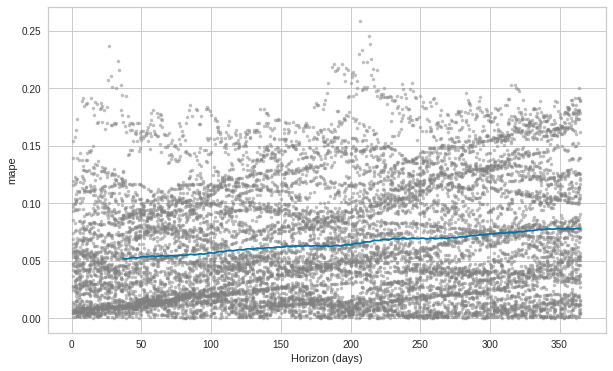

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')